<a href="https://colab.research.google.com/github/manasik29/Predict-whether-an-individual-will-hire-an-Attorney-or-not-by-Logistic_Regression/blob/main/Logistic_Regression_Mansi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/claimants.csv')

In [ ]:
df.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [ ]:
df.tail()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177
1339,34153,1,1.0,1.0,0.0,30.0,0.688


In [ ]:
df.shape

(1340, 7)

EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1340 non-null   int64  
 1   ATTORNEY  1340 non-null   int64  
 2   CLMSEX    1328 non-null   float64
 3   CLMINSUR  1299 non-null   float64
 4   SEATBELT  1292 non-null   float64
 5   CLMAGE    1151 non-null   float64
 6   LOSS      1340 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


In [ ]:
#to drop CASENUM columns as not required
df = df.drop('CASENUM', axis=1)

In [ ]:
df.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [ ]:
df.shape

(1340, 6)

In [ ]:
#to check duplicate values
df[df.duplicated()].shape

(26, 6)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(1314, 6)

In [ ]:
df.corr()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
ATTORNEY,1.000000,0.083894,0.077188,-0.056481,0.011157,-0.218165
CLMSEX,0.083894,1.000000,0.066948,-0.015066,-0.025859,-0.027880
CLMINSUR,0.077188,0.066948,1.000000,0.022053,0.050044,0.007458
SEATBELT,-0.056481,-0.015066,0.022053,1.000000,-0.028245,0.110635
CLMAGE,0.011157,-0.025859,0.050044,-0.028245,1.000000,0.063579
LOSS,-0.218165,-0.027880,0.007458,0.110635,0.063579,1.000000


In [ ]:
#to check missing values
df.isna().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      171
LOSS          0
dtype: int64

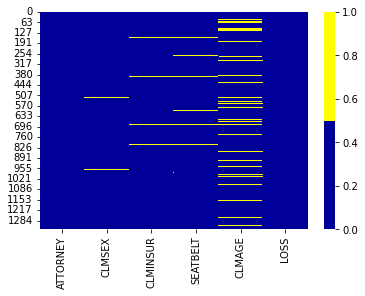

In [ ]:
#to genrate heat map
import seaborn as sns
cols = df.columns
colors = ['#000099', '#ffff00']   #define colors, yellow for missing, blue for non missing
sns.heatmap(df[cols].isnull(),
               cmap= sns.color_palette(colors))

In [ ]:
#treat missing values in CLMAGE by mean imputation and for other columns we will drop NA values.
df.CLMAGE.fillna(df.CLMAGE.mean(), inplace = True)

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [ ]:
df.reset_index()

,index,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0,0.0,1.0,0.0,50.000000,34.940
1,1,1,1.0,0.0,0.0,18.000000,0.891
2,2,1,0.0,1.0,0.0,5.000000,0.330
3,3,0,0.0,1.0,1.0,31.000000,0.037
4,4,1,0.0,1.0,0.0,30.000000,0.038
...,...,...,...,...,...,...,...
1238,1335,1,0.0,1.0,0.0,28.434821,0.576
1239,1336,0,1.0,1.0,0.0,46.000000,3.705
1240,1337,1,1.0,1.0,0.0,39.000000,0.099
1241,1338,0,1.0,0.0,0.0,8.000000,3.177


In [ ]:
#to correct the dtypes of columns
df['ATTORNEY'] = df['ATTORNEY'].astype('category')
df['CLMSEX'] = df['CLMSEX'].astype('category')
df['CLMINSUR'] = df['CLMINSUR'].astype('category')
df['SEATBELT'] = df['SEATBELT'].astype('category')
df['CLMAGE'] = df['CLMAGE'].astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   ATTORNEY  1243 non-null   category
 1   CLMSEX    1243 non-null   category
 2   CLMINSUR  1243 non-null   category
 3   SEATBELT  1243 non-null   category
 4   CLMAGE    1243 non-null   int64   
 5   LOSS      1243 non-null   float64 
dtypes: category(4), float64(1), int64(1)
memory usage: 34.5 KB


In [ ]:
df.describe()

,CLMAGE,LOSS
count,1243.000000,1243.000000
mean,28.534191,3.950685
std,19.077039,11.003335
min,0.000000,0.000000
25%,10.000000,0.405000
50%,28.000000,1.105000
75%,41.000000,3.852000
max,95.000000,173.604000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


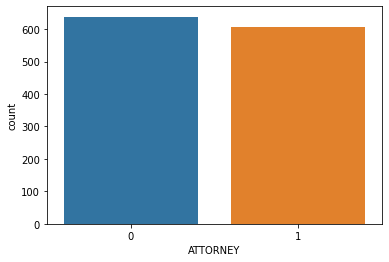

In [ ]:
#Univariate Analysis
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.countplot(df.ATTORNEY)

0- Male, 1 - Female


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


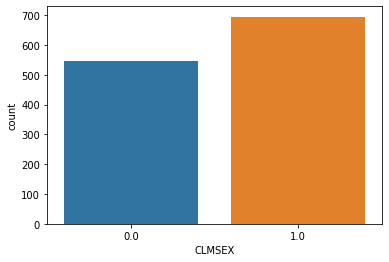

In [ ]:
sns.countplot(df.CLMSEX)

print("0- Male, 1 - Female")

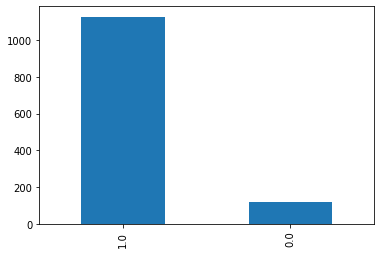

In [ ]:
df['CLMINSUR'].value_counts().plot.bar()

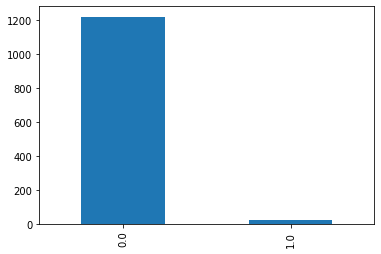

In [ ]:
df['SEATBELT'].value_counts().plot.bar()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


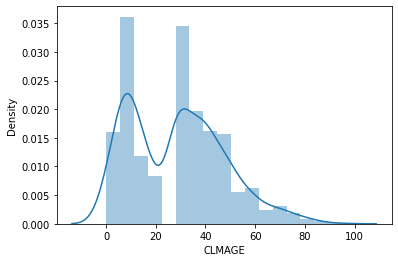

In [ ]:
import seaborn as sns
sns.distplot(df.CLMAGE)

In [ ]:
print("The skewness of Age distplot is:", df.CLMAGE.skew())
print("The kurtosis of Age distplot is:", df.CLMAGE.kurt())

The skewness of Age distplot is: 0.453580034445719
The kurtosis of Age distplot is: -0.4108811279518072


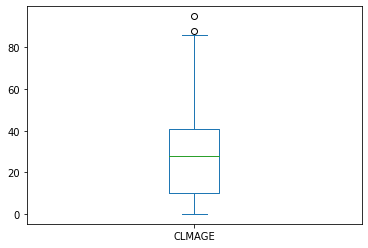

In [ ]:
img = df.CLMAGE.plot.box()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


{'boxes': [<matplotlib.lines.Line2D at 0x7fa599d30e90>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa599d38f10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa599e67e90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa599d40a10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa599d76810>,
  <matplotlib.lines.Line2D at 0x7fa599d389d0>]}

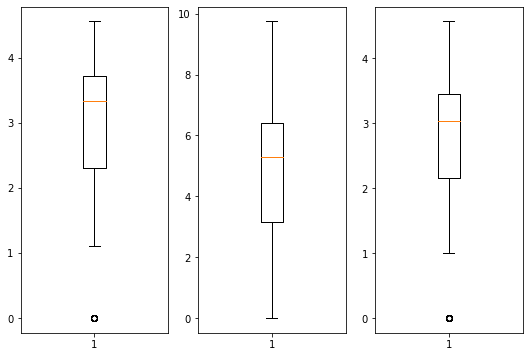

In [ ]:
#Let's try tranformation to treat outliers
plt.subplots(figsize = (9,6))
plt.subplot(131)
plt.boxplot(np.log(df['CLMAGE']))
plt.subplot(132)
plt.boxplot(np.sqrt(df['CLMAGE']))
plt.subplot(133)
plt.boxplot(np.cbrt(df['CLMAGE']))

Here, we can observe by sqrt transformation we are able to remove the outliers of CLMAGE column.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


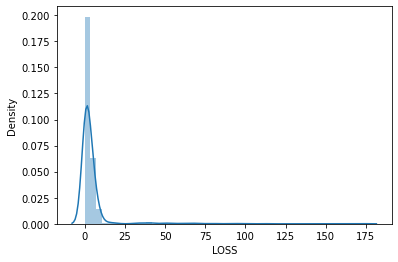

In [ ]:
sns.distplot(df.LOSS)

In [ ]:
print("The skewness of Age distplot is:", df.LOSS.skew())
print("The kurtosis of Age distplot is:", df.LOSS.kurt())

The skewness of Age distplot is: 7.484351785096243
The kurtosis of Age distplot is: 73.9776389096357


[array([ 34.94 ,  19.61 ,  16.161,  10.04 ,  13.1  ,  33.633,  44.06 ,
         34.571,  40.364,   9.796,  49.56 ,  59.497,  33.451,  40.46 ,
          9.898,  15.816,  40.   ,  81.   ,  68.56 ,   9.061,  41.115,
        173.604,  18.109,  50.   ,  49.015,  68.548,  54.711,  93.   ,
         61.047,  66.689,  41.434,  63.361,  15.766,   9.16 ,  19.934,
          9.436,   9.909,  51.146,  74.776, 111.405,  50.   ,  78.767,
         31.005,  67.697,   9.849,   9.685,  17.404,  36.147,  10.869,
         88.71 ,   9.485,  96.007,  40.574,  10.718,  15.001,  13.789,
         13.   ,  30.64 ,  55.709,  14.884])]

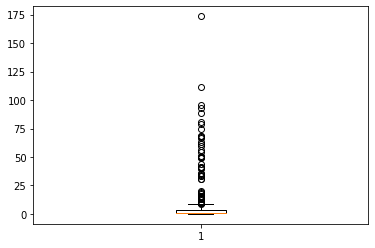

In [ ]:
box1 = plt.boxplot(df.LOSS)
[item.get_ydata() for item in box1['fliers']]   #fliers for otuliers

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


{'boxes': [<matplotlib.lines.Line2D at 0x7fa599e74bd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa599e7ac10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa599fe5950>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa599e82710>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa599eb7510>,
  <matplotlib.lines.Line2D at 0x7fa599e7a6d0>]}

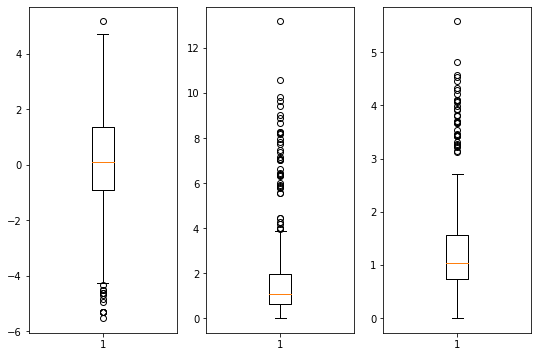

In [ ]:
#Lets try log transformation on this column
import numpy as np
plt.subplots(figsize = (9,6))
plt.subplot(131)
plt.boxplot(np.log(df['LOSS']))
plt.subplot(132)
plt.boxplot(np.sqrt(df['LOSS']))
plt.subplot(133)
plt.boxplot(np.cbrt(df['LOSS']))

We can observe even after performing transformation we are not able to remove outliers in LOSS column.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   ATTORNEY  1243 non-null   category
 1   CLMSEX    1243 non-null   category
 2   CLMINSUR  1243 non-null   category
 3   SEATBELT  1243 non-null   category
 4   CLMAGE    1243 non-null   int64   
 5   LOSS      1243 non-null   float64 
dtypes: category(4), float64(1), int64(1)
memory usage: 66.8 KB


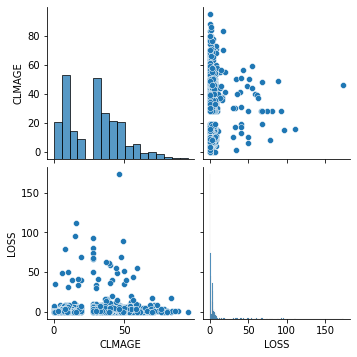

In [ ]:
sns.pairplot(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


CLMSEX,0.0,1.0
ATTORNEY,,
0,309,329
1,239,366


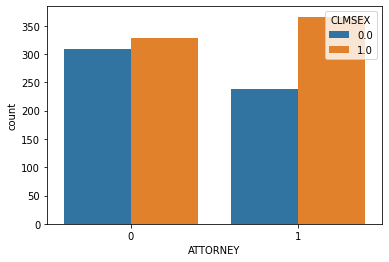

In [ ]:
#Bivariate Analysis
sns.countplot(df.ATTORNEY, hue = df.CLMSEX)

pd.crosstab(df.ATTORNEY, df.CLMSEX)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


CLMINSUR,0.0,1.0
ATTORNEY,,
0,75,563
1,42,563


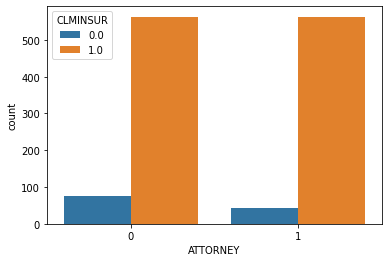

In [ ]:
sns.countplot(df.ATTORNEY, hue = df.CLMINSUR)

pd.crosstab(df.ATTORNEY, df.CLMINSUR)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


SEATBELT,0.0,1.0
ATTORNEY,,
0,622,16
1,599,6


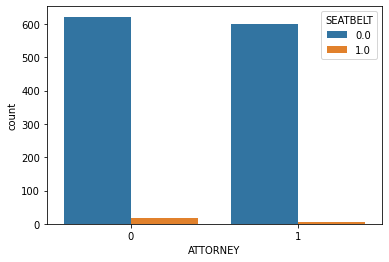

In [ ]:
sns.countplot(df.ATTORNEY, hue = df.SEATBELT)

pd.crosstab(df.ATTORNEY, df.SEATBELT)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


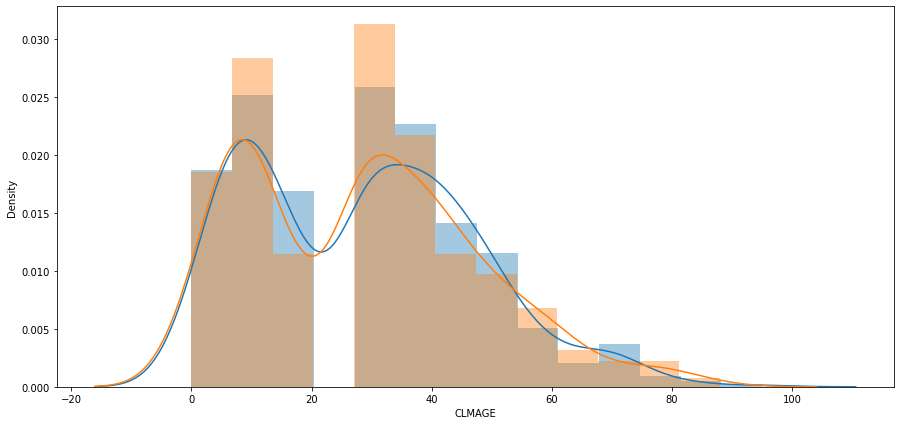

In [ ]:
#ATTORNEY with Age

plt.figure(figsize=(15,7))
sns.distplot(df[df['ATTORNEY']==0]['CLMAGE'])
sns.distplot(df[df['ATTORNEY']==1]['CLMAGE'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


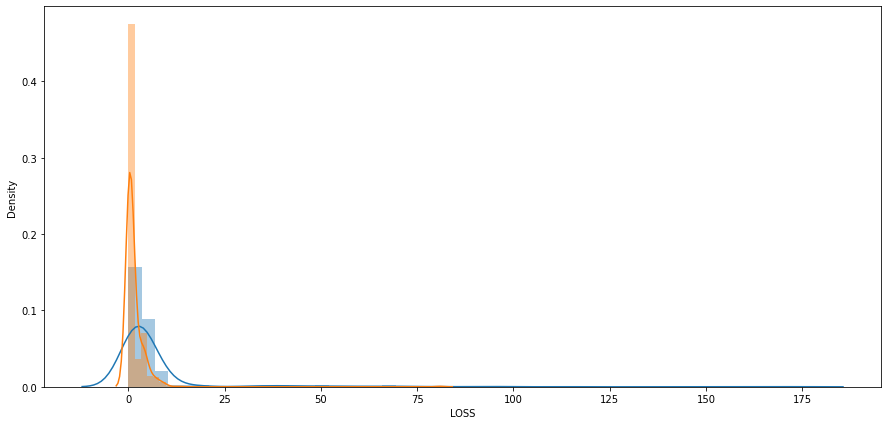

In [ ]:
#ATTORNEY with Age

plt.figure(figsize=(15,7))
sns.distplot(df[df['ATTORNEY']==0]['LOSS'])
sns.distplot(df[df['ATTORNEY']==1]['LOSS'])

**To Fit a Model**

In [ ]:
# Dividing our data into input and output variables 
X = df.iloc[:,1:]
Y = df.iloc[:,0]

In [ ]:
#Logistic regression and fit the model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [ ]:
#Predict for X dataset
y_pred = classifier.predict(X)

In [ ]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [ ]:
y_pred_df

,actual,predicted_prob
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
1335,1,1
1336,0,0
1337,1,1
1338,0,0


In [ ]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[413 225]
 [143 462]]


In [ ]:
((413+462)/(413+225+143+462))*100

70.39420756234915

In [ ]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.65      0.69       638
           1       0.67      0.76      0.72       605

    accuracy                           0.70      1243
   macro avg       0.71      0.71      0.70      1243
weighted avg       0.71      0.70      0.70      1243



In [ ]:
# ROC Curve

Text(0, 0.5, 'True Positive Rate')

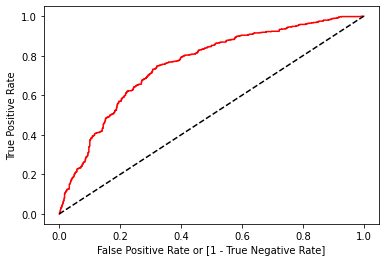

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [ ]:
auc

0.7054858934169279